In [1]:
import pandas as pd
np = pd.np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/govdata/govdata_15min_panel.csv', index_col=[0,1], parse_dates=True)

In [3]:
df.sort_index(inplace=True)
df

pm25   pm10
monitor_id      timestamp_round                  
AnandVihar_DPCC 2018-02-28 18:30:00  163.0  525.0
                2018-02-28 18:45:00  163.0  525.0
                2018-02-28 19:00:00  163.0  525.0
                2018-02-28 19:15:00  163.0  525.0
                2018-02-28 19:30:00  172.0  703.0
                2018-02-28 19:45:00  172.0  703.0
                2018-02-28 20:00:00  172.0  703.0
                2018-02-28 20:15:00  172.0  703.0
                2018-02-28 20:30:00  154.0  746.0
                2018-02-28 20:45:00  154.0  746.0
                2018-02-28 21:00:00  154.0  746.0
                2018-02-28 21:15:00  154.0  746.0
                2018-02-28 21:30:00  188.0  685.0
                2018-02-28 21:45:00  188.0  685.0
                2018-02-28 22:00:00  188.0  685.0
                2018-02-28 22:15:00  188.0  685.0
                2018-02-28 22:30:00  153.0  516.0
                2018-02-28 22:45:00  153.0  516.0
                2018-02-28 23:00:00  153.0  516.0
                2018-02-28 23:15:00  153.0  516.0
                2018-02-28 23:30:00  195.0  707.0
                2018-02-28 23:45:00  195.0  707.0
                2018-03-01 00:00:00  195.0  707.0
                2018-03-01 00:15:00  195.0  707.0
                2018-03-01 00:30:00  181.0  606.0
                2018-03-01 00:45:00  181.0  606.0
                2018-03-01 01:00:00  181.0  606.0
                2018-03-01 01:15:00  181.0  606.0
                2018-03-01 01:30:00  174.0  550.0
                2018-03-01 01:45:00  174.0  550.0
...                                    ...    ...
Wazirpur_DPCC   2018-10-31 11:00:00  162.0  323.0
                2018-10-31 11:15:00  162.0  323.0
                2018-10-31 11:30:00  162.0  323.0
                2018-10-31 11:45:00  162.0  323.0
                2018-10-31 12:00:00  183.0  409.0
                2018-10-31 12:15:00  183.0  409.0
                2018-10-31 12:30:00  183.0  409.0
                2018-10-31 12:45:00  183.0  409.0
                2018-10-31 13:00:00  217.0  520.0
                2018-10-31 13:15:00  217.0  520.0
                2018-10-31 13:30:00  217.0  520.0
                2018-10-31 13:45:00  217.0  520.0
                2018-10-31 14:00:00  340.0  807.0
                2018-10-31 14:15:00  340.0  807.0
                2018-10-31 14:30:00  340.0  807.0
                2018-10-31 14:45:00  340.0  807.0
                2018-10-31 15:00:00  517.0  940.0
                2018-10-31 15:15:00  517.0  940.0
                2018-10-31 15:30:00  517.0  940.0
                2018-10-31 15:45:00  517.0  940.0
                2018-10-31 16:00:00  407.0  704.0
                2018-10-31 16:15:00  407.0  704.0
                2018-10-31 16:30:00  407.0  704.0
                2018-10-31 16:45:00  407.0  704.0
                2018-10-31 17:00:00  309.0  576.0
                2018-10-31 17:15:00  309.0  576.0
                2018-10-31 17:30:00  309.0  576.0
                2018-10-31 17:45:00  309.0  576.0
                2018-10-31 18:00:00  404.0  721.0
                2018-10-31 18:15:00  404.0  721.0

[776160 rows x 2 columns]

In [7]:
locs_df = pd.read_csv('data/govdata/govdata_locations.csv', index_col=[0])
locs_df

,Latitude,Longitude,Location
Monitor ID,,,
AnandVihar_DPCC,28.646835,77.316032,"Anand Vihar, Delhi - DPCC"
AshokVihar_DPCC,28.695381,77.181665,"Ashok Vihar, Delhi - DPCC"
AyaNagar_IMD,28.470691,77.109936,"Aya Nagar, New Delhi - IMD"
BurariCrossing_IMD,28.725650,77.201157,"Burari Crossing, New Delhi - IMD"
CRRIMathuraRoad_IMD,28.551201,77.273574,"CRRI Mathura Road, New Delhi - IMD"
DKSSR_DPCC,28.498571,77.264840,"Dr. Karni Singh Shooting Range, Delhi - DPCC"
DTU_CPCB,28.750050,77.111261,"DTU, New Delhi - CPCB"
DwarkaSector8_DPCC,28.571027,77.071901,"Dwarka-Sector 8, Delhi - DPCC"
EastArjunNagar_CPCB,28.655602,77.285932,"East Arjun Nagar, Delhi - CPCB"


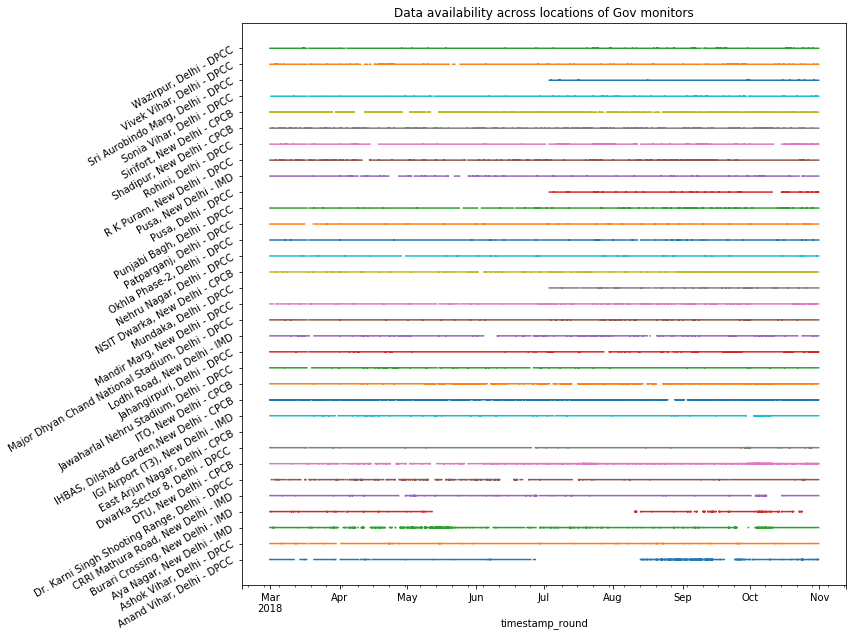

In [8]:
grouped = df.groupby(level=0)

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)

for count, (name, group) in enumerate(grouped, 1):
    # plot the data availability
    group.reset_index(level=0, drop=False, inplace=True)
    group.pm25.where(np.isnan(group.pm25), other=count).plot()

ax.set_yticks(np.arange(1,count+1))
ax.set_yticklabels([locs_df.loc[name,'Location'] for (name,group) in grouped], rotation=30)
ax.set_title('Data availability across locations of Gov monitors')
plt.tight_layout()
fig.savefig('data/datagaps_pm25_govdata.png')
fig.savefig('data/datagaps_pm25_govdata.pdf')

In [13]:
plt.close('all')